In [66]:
import torchvision
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [62]:

trainset = torchvision.datasets.CIFAR10(
  root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor()
)

transforms = torchvision.transforms.Compose([
  torchvision.transforms.Resize(224),
  torchvision.transforms.ToTensor(),
  ])
resized_trainset = torchvision.datasets.CIFAR10(
  root='./data', train=True, download=True, transform=transforms
)

In [42]:
imgs, labels = [], []
for i in range(10):
  img, label = trainset.__getitem__(i)
  imgs.append(img)
  labels.append(label)

In [32]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for c in class_names:
  print(c)

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


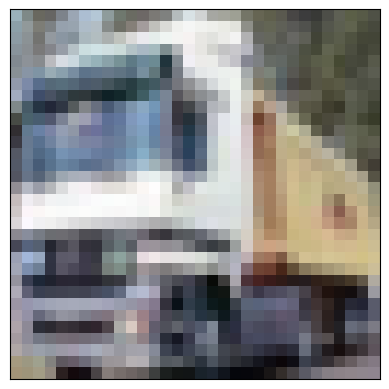

In [59]:
plt.imshow(imgs[1].transpose(0, 2).transpose(0, 1).numpy())
plt.xticks([])
plt.yticks([])
plt.savefig('truck_img.png')
plt.show()

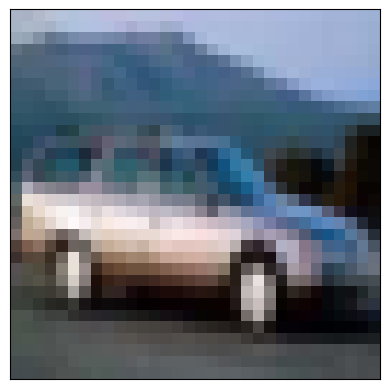

In [58]:
plt.imshow(imgs[4].transpose(0, 2).transpose(0, 1).numpy())
plt.xticks([])
plt.yticks([])
plt.savefig('automobile_img.png')
plt.show()

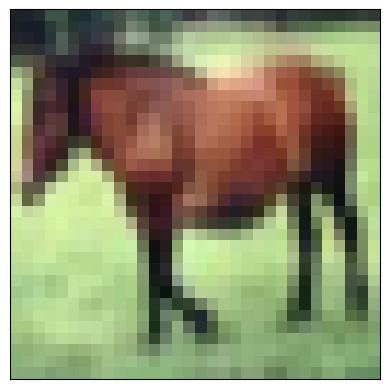

In [56]:
plt.imshow(imgs[7].transpose(0, 2).transpose(0, 1).numpy())
plt.xticks([])
plt.yticks([])
plt.savefig('horse_img.png')
plt.show()


In [104]:
import timm
import detectors

resnet18 = timm.create_model("resnet34_cifar10", pretrained=True)
for p in resnet18.parameters():
  p.requires_grad = False


In [105]:
#truck_img, truck_label = resized_trainset.__getitem__(1)
truck_img, truck_label = trainset.__getitem__(1)
auto_img, auto_label = trainset.__getitem__(4)
horse_img, horse_label = trainset.__getitem__(7)

logits = resnet18(auto_img.unsqueeze(0))
preds = F.softmax(logits, dim=-1)

for i in range(10):
  print(f"{class_names[i]}: {preds[0][i].item() * 100:.2f}")

airplane: 10.87
automobile: 12.86
bird: 9.51
cat: 11.36
deer: 8.91
dog: 9.47
frog: 9.42
horse: 7.61
ship: 8.90
truck: 11.10
